In [2]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# Load the dataset
#Import standardised data as a pandas Dataframe
df = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0.xlsx")

X_std = df.values

print(X_std.shape)
print(X_std)

#Import Y data as an array

df_y = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0_eat26.xlsx")

y = np.ravel(df_y.values)
print(y.shape)
print(y)

estimators_classif = [
    #linear estimators
    ['Ridge', {'alpha': np.logspace(-5, +5, 11)}, Ridge(random_state=0)],
    ['Lasso', {'alpha': np.logspace(-5, +5, 11)}, Lasso(random_state=0)],
    #non-linear estimators
    ['RandomForest', {'n_estimators':[100,200,300], 'max_depth': [3,5,10,None]}, RandomForestRegressor(random_state=0)],
    ['kNN', {'n_neighbors': np.arange(3,16,2)}, KNeighborsRegressor()],
    #['DecisionTree', {'max_depth': [3,5,10,None]}, DecisionTreeRegressor(random_state=0)],
    #['ExtraTrees', {'n_estimators':[100,200,300],'max_depth': [3,5,10,None]}, ExtraTreesRegressor(random_state=0)],
    #['GradientBoosting', {'n_estimators':[60,100], 'learning_rate':[0.1,0.2,0.5,1], 'max_depth': [3,5,10,None]}, GradientBoostingRegressor(random_state=0)],
]
print(estimators_classif)

inner_cv = KFold(n_splits = 4, shuffle=True, random_state=0)
outer_cv = KFold(n_splits = 4, shuffle=True, random_state=0)

#Nested CV with parameter optimization
best_score = 0
selected_model = None
score_VP = {}
for est in estimators_classif:
    clf = GridSearchCV(estimator=est[2], param_grid=est[1], cv=inner_cv)
    clf.fit(X_std, y)
    print(clf.best_estimator_)
    print(clf.best_score_)
    #Extraction for violin plot
    score_VP[est[0]]=cross_val_score(clf.best_estimator_, X=X_std, y=y, cv=inner_cv)
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        selected_model = clf.best_estimator_
        
nested_scores = cross_val_score(selected_model, X=X_std, y=y, cv=outer_cv)
nested_scores = nested_scores.mean()

print(selected_model)
print(nested_scores)

(387, 37)
[[-0.21291114  0.69679411  1.24562066 ...  1.43317939 -0.0221473
   0.        ]
 [ 2.0506248   0.46684023  0.50622099 ... -0.64493073 -0.82872102
   1.        ]
 [ 0.69250324 -0.39510669  0.64705902 ... -1.26836376  0.24671061
   0.        ]
 ...
 [ 0.69250324  0.21998721  1.77376328 ...  1.43317939 -0.82872102
   0.        ]
 [-0.66561833 -0.45516085  0.38298771 ... -0.64493073 -0.55986311
   1.        ]
 [ 0.23979605  1.77086952  0.36538296 ... -0.43711971  0.24671061
   1.        ]]
(387,)
[11 22  8 20 46 28 22  8  8 31  8 28 62 12 26 10 22  6 24 14 26  0  8 29
 19  6 51 37  1 18 18  4 14  9  8 23 22 17 14 17  2 33 29 22 10  0  3 14
 18 27  1  4 36 12  2  0  1 42 14  7 17 18  6  6 20 17  8  1  7 30  1 22
 40 12  6  7 10 48 14  4 13  8  2  7 15 35 34  4 49  4 16 13  3  5  1  3
  8 10  6 12 17  6 37 41 14 34  2 21 48 20  2 18  1 13 21 41  0 24 12 55
  0  7 22 16  3 16  9 26  9  3  4  7  7 11  2  4 32  3  1  6  0 11 17 11
  4 17  7 11  9  6  5  6 12  8  1  4  3  0  8  7  5 30

      Ridge     Lasso  RandomForest       kNN
0  0.470930  0.413751      0.485549  0.480801
1  0.587898  0.627782      0.575805  0.480099
2  0.456382  0.445619      0.442144  0.484495
3  0.555108  0.556949      0.498466  0.463324


<AxesSubplot:>

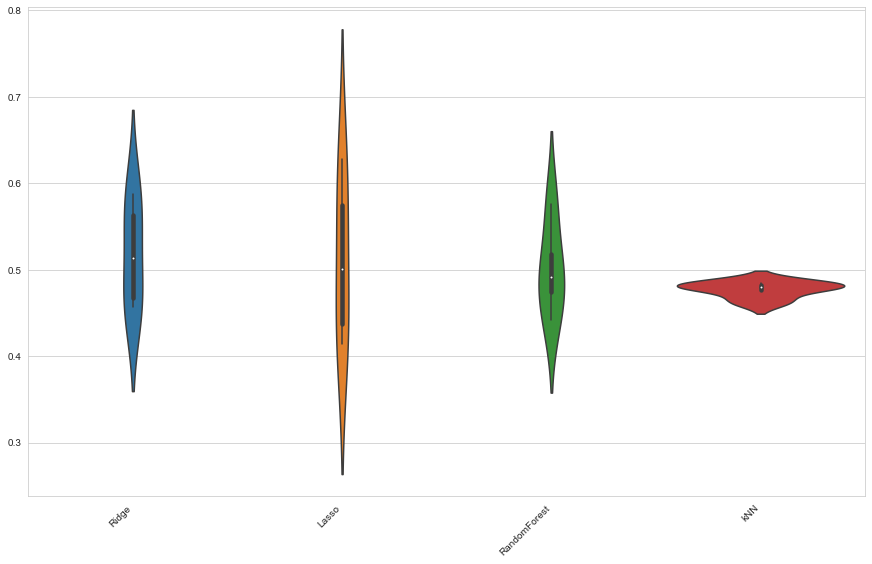

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_dataVP = pd.DataFrame.from_dict(score_VP)
print(df_dataVP)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 9))
_ = plt.xticks(rotation=45, ha='right')

sns.violinplot(data = df_dataVP)